In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
import matplotlib.pyplot as plt

In [ ]:
from google .colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Complete-data.csv")

# New Section

In [ ]:
data.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [ ]:
data.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
x = data.drop("Landslide",axis=1)


In [ ]:
y = data['Landslide']

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1207    1
1208    1
1209    1
1210    1
1211    1
Name: Landslide, Length: 1212, dtype: int64


SVM

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size =0.50,random_state = 10 )

In [ ]:
SVM_rbf = SVC(kernel = 'rbf',random_state=100 , gamma=3.0 ,C=1.5)
SVM_classifier = SVM_rbf.fit(X_train , Y_train)
SVM_predicion = SVM_classifier.predict(X_test)
#SVM_single_prediction = SVM_classifier.predict([[15,136,70,32,110,37.1 ,0.153,43]])
#print(SVM_predicion)

In [ ]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test,  SVM_predicion)

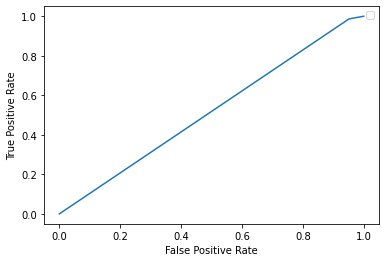

In [ ]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
CM= confusion_matrix(Y_test,SVM_predicion)
print(CM)
CR = classification_report(Y_test,SVM_predicion)
print(CR)

[[ 15 296]
 [  4 291]]
              precision    recall  f1-score   support

           0       0.79      0.05      0.09       311
           1       0.50      0.99      0.66       295

    accuracy                           0.50       606
   macro avg       0.64      0.52      0.38       606
weighted avg       0.65      0.50      0.37       606



In [ ]:
tn, fp, fn, tp = CM.ravel()
tot = CM.sum()
print('True Positive Rate', tp/tot)
print('True Negative Rate', tn/tot)
print('False Positive Rate', fp/tot)
print('False Negative Rate', fn/tot)

In [ ]:
data.keys()

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope'],
      dtype='object')

In [ ]:
print("Landslide True: ", (data.Landslide.values == 1).sum())
print("Landslide False: ", (data.Landslide.values == 0).sum())

Landslide True:  606
Landslide False:  606


In [ ]:
data.max()

Landslide        1
Aspect           5
Curvature        5
Earthquake       3
Elevation        5
Flow             5
Lithology        6
NDVI             5
NDWI             5
Plan             5
Precipitation    5
Profile          5
Slope            5
dtype: int64

In [ ]:
data.min()

Landslide        0
Aspect           1
Curvature        1
Earthquake       1
Elevation        1
Flow             1
Lithology        1
NDVI             1
NDWI             1
Plan             1
Precipitation    1
Profile          1
Slope            1
dtype: int64

In [ ]:
data.isnull().sum()

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
dtype: int64

In [ ]:
data.corr()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
Landslide,1.000000,-0.008633,-0.173393,0.187313,-0.168049,-0.261124,-0.120538,0.111900,-0.194317,-0.103052,0.280490,0.169928,0.123029
Aspect,-0.008633,1.000000,-0.024232,0.014727,0.017998,0.024295,0.025086,-0.158561,0.168099,-0.043066,-0.010454,-0.015876,0.048420
Curvature,-0.173393,-0.024232,1.000000,-0.049595,0.193843,0.025736,0.058319,0.094625,-0.089028,0.815075,-0.104207,-0.806851,0.143316
Earthquake,0.187313,0.014727,-0.049595,1.000000,0.071308,0.003382,0.095507,-0.134619,0.118588,-0.022582,0.825169,0.049177,0.055050
Elevation,-0.168049,0.017998,0.193843,0.071308,1.000000,0.026903,0.429702,-0.217003,0.187921,0.104691,-0.003628,-0.228721,0.333029
Flow,-0.261124,0.024295,0.025736,0.003382,0.026903,1.000000,-0.033881,-0.393805,0.462291,0.041163,0.002451,-0.011119,-0.078842
Lithology,-0.120538,0.025086,0.058319,0.095507,0.429702,-0.033881,1.000000,-0.129279,0.119080,0.008051,0.005351,-0.048930,0.169103
NDVI,0.111900,-0.158561,0.094625,-0.134619,-0.217003,-0.393805,-0.129279,1.000000,-0.931590,0.102043,-0.096063,-0.042720,0.041726
NDWI,-0.194317,0.168099,-0.089028,0.118588,0.187921,0.462291,0.119080,-0.931590,1.000000,-0.097774,0.078201,0.040269,-0.098171
Plan,-0.103052,-0.043066,0.815075,-0.022582,0.104691,0.041163,0.008051,0.102043,-0.097774,1.000000,-0.072768,-0.487539,0.055292


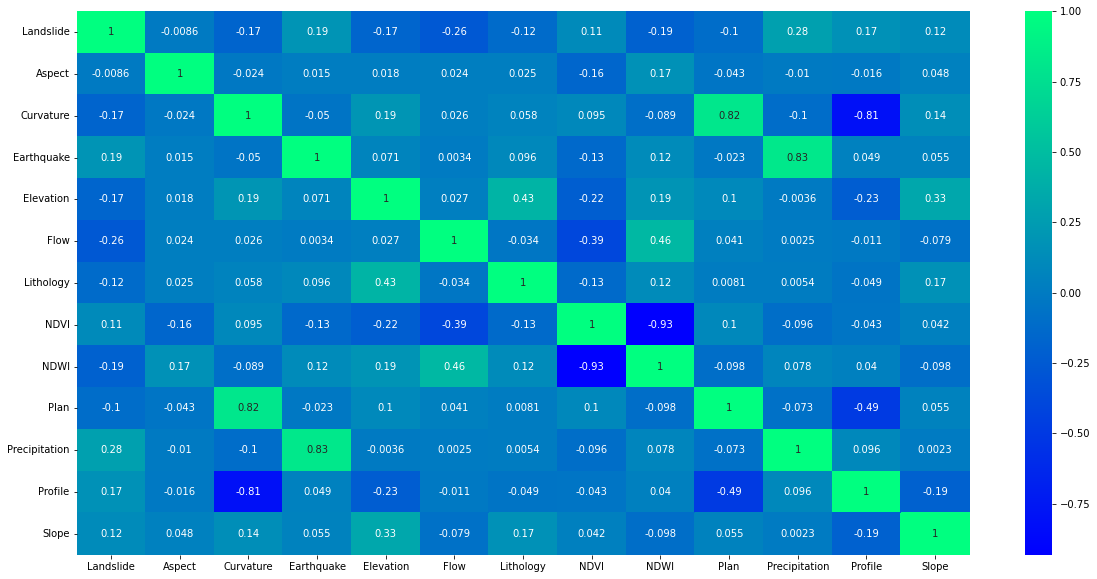

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True, cmap="winter")

In [ ]:
data.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_x= scaler.transform(x)

In [ ]:
pca = PCA(n_components=8)
pca.fit(scaled_x)
pca_x =pca.transform(scaled_x)
pca_x.shape

(1212, 8)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
#Support Vector Machine (SVM)
param_grid = {'C' : [0,1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001],
              'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit= True, verbose= 3)
grid.fit(pca_x,y)
grid.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .........C=0, gamma=0.01, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=0.01, kernel=r

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
#Support Vector Machine (SVM)
svm = SVC(C= 10, gamma= 0.01, kernel= 'rbf')
svm_y_pre = cross_val_predict(svm, pca_x, y, cv=10)
svm_sc = accuracy_score(y, svm_y_pre) * 100
svm_sc = "{:.2f}".format(svm_sc)
print(svm_sc)

75.99


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_y_pre = cross_val_predict(nb, pca_x, y, cv=10)
nb_sc = accuracy_score(y, nb_y_pre) * 100
nb_sc = "{:.2f}".format(nb_sc)
print(nb_sc)

72.44


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#random_forest
rf = RandomForestClassifier(max_depth=100, random_state=20)
rf_y_pre = cross_val_predict(rf, pca_x, y, cv=10)
rf_sc = accuracy_score(y, rf_y_pre) * 100
rf_sc = "{:.2f}".format(rf_sc)
print(rf_sc)

74.42


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#decision tree

dt = DecisionTreeClassifier(criterion='entropy',max_depth=100, random_state=10)
dt_y_pre = cross_val_predict(dt, pca_x, y, cv=10)
dt_sc = accuracy_score(y, dt_y_pre) * 100
dt_sc = "{:.2f}".format(dt_sc)
print(dt_sc)

63.78


In [ ]:
from sklearn.linear_model import LogisticRegression

#logisrtic regression classifier

lg = LogisticRegression(random_state=0)
lg_y_pre = cross_val_predict(lg, pca_x, y, cv=10)
lg_sc = accuracy_score(y, lg_y_pre) * 100
lg_sc = "{:.2f}".format(lg_sc)
print(lg_sc)

69.64


In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('LG', lg), ('RF', rf)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))





              precision    recall  f1-score   support

           0       0.81      0.72      0.76       311
           1       0.74      0.83      0.78       295

    accuracy                           0.77       606
   macro avg       0.78      0.77      0.77       606
weighted avg       0.78      0.77      0.77       606



In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('DT', dt), ('RF', rf)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       311
           1       0.66      0.75      0.70       295

    accuracy                           0.69       606
   macro avg       0.70      0.69      0.69       606
weighted avg       0.70      0.69      0.69       606



In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('DT', dt), ('LG', lg)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       311
           1       0.66      0.75      0.70       295

    accuracy                           0.69       606
   macro avg       0.70      0.69      0.69       606
weighted avg       0.70      0.69      0.69       606



In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('LG', lg), ('NB', nb)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       311
           1       0.71      0.84      0.77       295

    accuracy                           0.76       606
   macro avg       0.76      0.76      0.75       606
weighted avg       0.77      0.76      0.75       606



In [ ]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('RF', rf), ('NB', nb)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       311
           1       0.73      0.84      0.78       295

    accuracy                           0.77       606
   macro avg       0.78      0.78      0.77       606
weighted avg       0.78      0.77      0.77       606



In [ ]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('RF', rf), ('NB', nb) ,('LG', lg),('DT', lg)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       311
           1       0.73      0.84      0.78       295

    accuracy                           0.77       606
   macro avg       0.78      0.77      0.77       606
weighted avg       0.78      0.77      0.77       606



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#gardientBoostingClassidier

GB = GradientBoostingClassifier(learning_rate=1.0,max_depth=1, random_state=1)
GB_y_pre = cross_val_predict(GB, pca_x, y, cv=10)
GB_sc = accuracy_score(y, GB_y_pre) * 100
GB_sc = "{:.2f}".format(GB_sc)
print(GB_sc)

68.32


In [ ]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('GB', GB), ('AB', ab)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.68      0.74       311
           1       0.71      0.81      0.76       295

    accuracy                           0.75       606
   macro avg       0.75      0.75      0.75       606
weighted avg       0.75      0.75      0.75       606



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#adaboost 

ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab_y_pre = cross_val_predict(ab, pca_x, y, cv=10)
ab_sc = accuracy_score(y, ab_y_pre) * 100
ab_sc = "{:.2f}".format(ab_sc)
print(ab_sc)

69.47
